## 소비유형별 개인 신용카드 지출 데이터 전처리 - pce_df

### raw 데이터 확인

In [ ]:
# raw 데이터 확인
import requests
import pandas as pd

# API URL
url = "https://ecos.bok.or.kr/api/StatisticSearch/2IJKJSOY6OFOQZ28900C/json/kr/1/100/601Y002/M/200001/202208/X/1100/DAV"

# 데이터 요청
response = requests.get(url)
data = response.json()

# 'StatisticSearch' 키에 포함된 데이터 추출
df = pd.DataFrame(data['StatisticSearch']['row'])
df.head()

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,WGT,TIME,DATA_VALUE
0,601Y002,7.5.2. 지역별 소비유형별 개인 신용카드,X,전국,1100,종합소매,DAV,월간 일평균,None,None,백만원,None,200912,142328
1,601Y002,7.5.2. 지역별 소비유형별 개인 신용카드,X,전국,1100,종합소매,DAV,월간 일평균,None,None,백만원,None,201001,125698
2,601Y002,7.5.2. 지역별 소비유형별 개인 신용카드,X,전국,1100,종합소매,DAV,월간 일평균,None,None,백만원,None,201002,139087
3,601Y002,7.5.2. 지역별 소비유형별 개인 신용카드,X,전국,1100,종합소매,DAV,월간 일평균,None,None,백만원,None,201003,137542
4,601Y002,7.5.2. 지역별 소비유형별 개인 신용카드,X,전국,1100,종합소매,DAV,월간 일평균,None,None,백만원,None,201004,131925


In [ ]:
import requests
import pandas as pd
from functools import reduce

# API 기본 URL
base_url = "https://ecos.bok.or.kr/api/StatisticSearch/2IJKJSOY6OFOQZ28900C/json/kr/1/100000/601Y002/M/200001/202409/X/{}/DAV"

# 분류 코드 리스트
codes = [1000, 1100, 1110, 1120, 1130, 1140, 1150, 1200, 1300, 1310, 1320, 1400, 1410, 1420, 1430, 1440, 1500, 1600, 1610, 1620, 1700, 1710, 1720, 1800, 1810, 1820, 1830, 1900, 1910, 1920, 1930, 2000, 2010, 2020, 2100, 2200, 2210, 2220, 2300, 2400, 2500]

# 각 분류 코드에 대한 데이터를 저장할 리스트
df_list = []

# 각 분류 코드에 맞는 데이터프레임 생성
for code in codes:
    url = base_url.format(code)
    response = requests.get(url)
    data = response.json()

    if 'StatisticSearch' in data and 'row' in data['StatisticSearch']:
        # 데이터프레임 생성
        df = pd.DataFrame(data['StatisticSearch']['row'])

        # 'ITEM_NAME2'를 새로운 열 이름으로 설정
        item_name = df['ITEM_NAME2'].iloc[0]

        # 필요한 열만 남기고 'DATA_VALUE' 열 이름을 ITEM_NAME2 값으로 변경
        df = df[['TIME', 'DATA_VALUE']]
        df.rename(columns={'DATA_VALUE': item_name}, inplace=True)

        # 데이터프레임 리스트에 추가
        df_list.append(df)
    else:
        print(f"데이터가 없습니다: 코드 {code}")

# 모든 데이터프레임을 TIME을 기준으로 병합
if df_list:
    merged_df = reduce(lambda left, right: pd.merge(left, right, on='TIME', how='outer'), df_list)
    print(merged_df.head())  # 병합된 데이터프레임 확인
else:
    print("병합할 데이터프레임이 없습니다.")


     TIME      합계    종합소매    백화점 대형마트/유통전문점   슈퍼마켓   편의점   면세점 전자상거래/통신판매  \
0  200912  785117  142328  41715      70680  22338  2413  5182      67402   
1  201001  681063  125698  33752      63557  21496  2290  4603      61235   
2  201002  728297  139087  32534      74950  24210  2876  4517      63111   
3  201003  758864  137542  35937      71158  22833  2566  5048      65964   
4  201004  740609  131925  34847      66138  23368  2588  4985      62341   

     식료품  ...  오락/문화 스포츠/오락/여가  서적/문구     교육  숙박/음식    숙박    음식점  \
0  14280  ...  36182     26751   9430  26859  94282  7570  86712   
1  12753  ...  30055     21989   8066  24961  81392  6603  74790   
2  17238  ...  30524     22151   8373  27959  80665  5912  74753   
3  13323  ...  38107     26434  11673  29400  89030  5962  83068   
4  13667  ...  35716     27383   8333  25576  90763  7442  83321   

  공과금/개인 및 전문 서비스  금융/보험     기타  
0           39239  28085  54677  
1           41038  25007  45902  
2           41866  26530  

In [ ]:
merged_df

,TIME,합계,종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,...,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험,기타
0,200912,785117,142328,41715,70680,22338,2413,5182,67402,14280,...,36182,26751,9430,26859,94282,7570,86712,39239,28085,54677
1,201001,681063,125698,33752,63557,21496,2290,4603,61235,12753,...,30055,21989,8066,24961,81392,6603,74790,41038,25007,45902
2,201002,728297,139087,32534,74950,24210,2876,4517,63111,17238,...,30524,22151,8373,27959,80665,5912,74753,41866,26530,50524
3,201003,758864,137542,35937,71158,22833,2566,5048,65964,13323,...,38107,26434,11673,29400,89030,5962,83068,39019,29771,51567
4,201004,740609,131925,34847,66138,23368,2588,4985,62341,13667,...,35716,27383,8333,25576,90763,7442,83321,41695,26394,51992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,202304,1967632,250551,52747,98132,61820,34503,3347,472360,32508,...,54950,46081,8869,41737,205073,8609,196464,209607,78966,146747
161,202305,1975475,270117,57910,107307,63811,37420,3669,480803,33622,...,57107,48359,8748,42190,215519,10325,205195,197031,77844,144401
162,202306,2023403,260462,50466,101762,65987,38658,3589,489507,33005,...,56189,47695,8494,44145,209057,9622,199435,221625,82132,149653
163,202307,2009643,261884,50445,105296,64836,37721,3586,491103,30560,...,51487,42351,9137,45034,211683,10034,201649,242582,78423,145025


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TIME             165 non-null    object
 1   합계               165 non-null    object
 2   종합소매             165 non-null    object
 3   백화점              165 non-null    object
 4   대형마트/유통전문점       165 non-null    object
 5   슈퍼마켓             165 non-null    object
 6   편의점              165 non-null    object
 7   면세점              165 non-null    object
 8   전자상거래/통신판매       165 non-null    object
 9   식료품              165 non-null    object
 10  일반식료품            165 non-null    object
 11  건강보조식품           165 non-null    object
 12  의류/잡화            165 non-null    object
 13  의복/직물            165 non-null    object
 14  복식잡화             165 non-null    object
 15  시계/귀금속/안경        165 non-null    object
 16  화장품              165 non-null    object
 17  연료               165 non-null    ob

In [ ]:
merged_df.TIME = pd.to_datetime(merged_df.TIME, format='%Y%m')
# 문자열 형태의 숫자를 수치형으로 변환 후, int로 타입 변환
for i in merged_df.columns[1:]:
    merged_df[i] = merged_df[i].apply(pd.to_numeric)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TIME             165 non-null    datetime64[ns]
 1   합계               165 non-null    int64         
 2   종합소매             165 non-null    int64         
 3   백화점              165 non-null    int64         
 4   대형마트/유통전문점       165 non-null    int64         
 5   슈퍼마켓             165 non-null    int64         
 6   편의점              165 non-null    int64         
 7   면세점              165 non-null    int64         
 8   전자상거래/통신판매       165 non-null    int64         
 9   식료품              165 non-null    int64         
 10  일반식료품            165 non-null    int64         
 11  건강보조식품           165 non-null    int64         
 12  의류/잡화            165 non-null    int64         
 13  의복/직물            165 non-null    int64         
 14  복식잡화             165 non-null    int64    

In [ ]:
merged_df.head()

,TIME,합계,종합소매,백화점,대형마트/유통전문점,슈퍼마켓,편의점,면세점,전자상거래/통신판매,식료품,...,오락/문화,스포츠/오락/여가,서적/문구,교육,숙박/음식,숙박,음식점,공과금/개인 및 전문 서비스,금융/보험,기타
0,2009-12-01,785117,142328,41715,70680,22338,2413,5182,67402,14280,...,36182,26751,9430,26859,94282,7570,86712,39239,28085,54677
1,2010-01-01,681063,125698,33752,63557,21496,2290,4603,61235,12753,...,30055,21989,8066,24961,81392,6603,74790,41038,25007,45902
2,2010-02-01,728297,139087,32534,74950,24210,2876,4517,63111,17238,...,30524,22151,8373,27959,80665,5912,74753,41866,26530,50524
3,2010-03-01,758864,137542,35937,71158,22833,2566,5048,65964,13323,...,38107,26434,11673,29400,89030,5962,83068,39019,29771,51567
4,2010-04-01,740609,131925,34847,66138,23368,2588,4985,62341,13667,...,35716,27383,8333,25576,90763,7442,83321,41695,26394,51992


In [ ]:
merged_df.index

RangeIndex(start=0, stop=165, step=1)

In [ ]:
# 최종 소비유형별 개인 월간 일평균 신용카드 지출 내역 데이터
pce_df = merged_df.copy()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

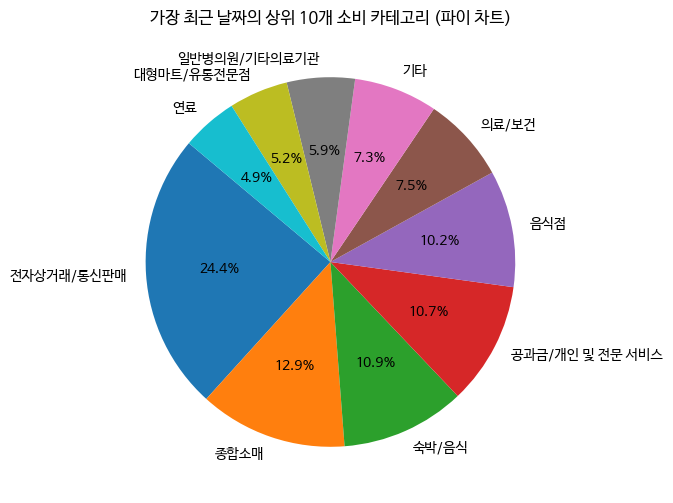

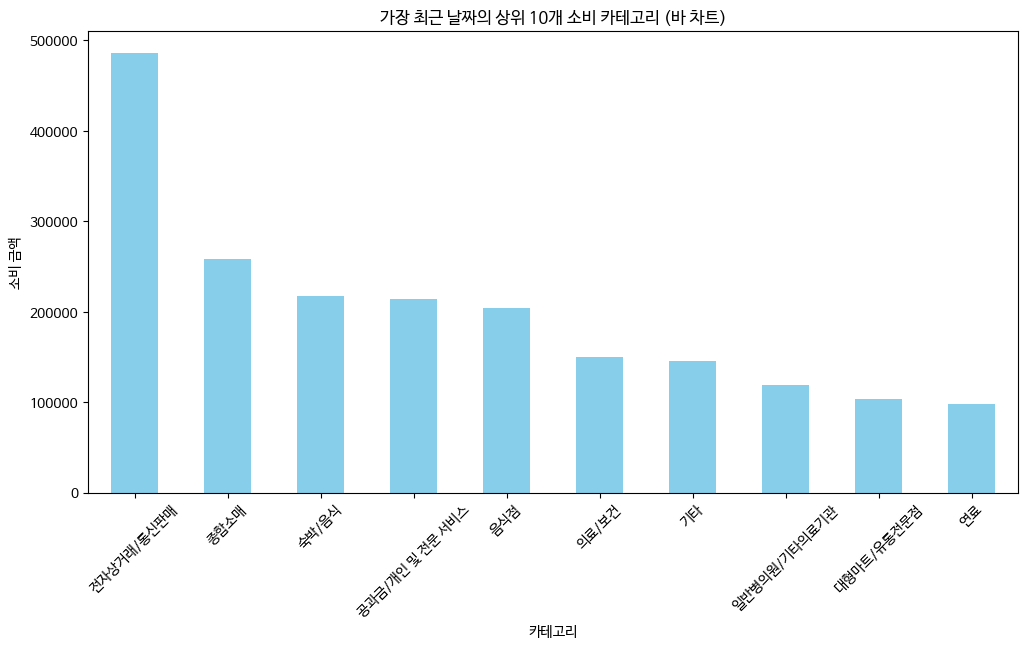

In [ ]:
# 2. matplotlib에 나눔고딕 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정
# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_prop = fm.FontProperties(fname=font_path)


# 마지막 행 선택 및 상위 10개 카테고리 선택
latest_row = pce_df.iloc[-1, 2:]  # TIME과 합계를 제외한 카테고리 선택
top_10_features = latest_row.astype(int).nlargest(10)  # 상위 10개 추출

plt.rc('font', family='NanumBarunGothic')

# 파이 차트
plt.figure(figsize=(10, 6))
plt.pie(top_10_features, labels=top_10_features.index, autopct='%1.1f%%', startangle=140)
plt.title("가장 최근 날짜의 상위 10개 소비 카테고리 (파이 차트)")
plt.show()

# 바 차트
plt.figure(figsize=(12, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.title("가장 최근 날짜의 상위 10개 소비 카테고리 (바 차트)")
plt.xlabel("카테고리")
plt.ylabel("소비 금액")
plt.xticks(rotation=45)
plt.show()

## 품목별 소비자 물가지수 데이터 전처리 - cpi_df

In [ ]:
# 필요한 라이브러리 임포트
import requests
import pandas as pd

# API 호출 URL
url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
params = {
    "method": "getList",
    "apiKey": "NGFlNDEwNzU4NTVjN2Y2ZTcyYzJiYmI5NjlhY2ExMzc=",  # API 키
    "orgId": "101",
    "tblId": "DT_1J22112",
    "itmId": "T+",
    "objL1": "T10+",
    "objL2": "ALL",
    "format": "json",
    "jsonVD": "Y",
    "prdSe": "M",
    "startPrdDe": "202001",
    "endPrdDe": "202409",
    "outputFields": "ORG_ID TBL_ID TBL_NM OBJ_ID OBJ_NM NM ITM_ID ITM_NM UNIT_NM PRD_SE PRD_DE LST_CHN_DE"
}

# API 요청 및 JSON 데이터 가져오기
response = requests.get(url, params=params)
data = response.json()

# 데이터프레임 변환
df = pd.DataFrame(data)

# 데이터프레임 확인
print(df.head())

                         TBL_NM  PRD_DE      TBL_ID   ITM_NM ITM_ID   UNIT_NM  \
0  품목별 소비자물가지수(품목성질별: 2020＝100)  202001  DT_1J22112  소비자물가지수      T  2020＝100   
1  품목별 소비자물가지수(품목성질별: 2020＝100)  202002  DT_1J22112  소비자물가지수      T  2020＝100   
2  품목별 소비자물가지수(품목성질별: 2020＝100)  202003  DT_1J22112  소비자물가지수      T  2020＝100   
3  품목별 소비자물가지수(품목성질별: 2020＝100)  202004  DT_1J22112  소비자물가지수      T  2020＝100   
4  품목별 소비자물가지수(품목성질별: 2020＝100)  202005  DT_1J22112  소비자물가지수      T  2020＝100   

  ORG_ID C1_OBJ_NM C2_OBJ_NM      DT PRD_SE C2   C1 C1_NM C2_NM  LST_CHN_DE  
0    101       시도별       품목별  100.09      M  0  T10    전국   총지수  2023-11-30  
1    101       시도별       품목별  100.16      M  0  T10    전국   총지수  2023-11-30  
2    101       시도별       품목별   99.94      M  0  T10    전국   총지수  2023-11-30  
3    101       시도별       품목별    99.5      M  0  T10    전국   총지수  2023-11-30  
4    101       시도별       품목별   99.44      M  0  T10    전국   총지수  2023-11-30  


In [ ]:
df

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_ID,UNIT_NM,ORG_ID,C1_OBJ_NM,C2_OBJ_NM,DT,PRD_SE,C2,C1,C1_NM,C2_NM,LST_CHN_DE
0,품목별 소비자물가지수(품목성질별: 2020＝100),202001,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,100.09,M,0,T10,전국,총지수,2023-11-30
1,품목별 소비자물가지수(품목성질별: 2020＝100),202002,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,100.16,M,0,T10,전국,총지수,2023-11-30
2,품목별 소비자물가지수(품목성질별: 2020＝100),202003,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,99.94,M,0,T10,전국,총지수,2023-11-30
3,품목별 소비자물가지수(품목성질별: 2020＝100),202004,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,99.5,M,0,T10,전국,총지수,2023-11-30
4,품목별 소비자물가지수(품목성질별: 2020＝100),202005,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,99.44,M,0,T10,전국,총지수,2023-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27583,품목별 소비자물가지수(품목성질별: 2020＝100),202405,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,108.07,M,F02L03111,T10,전국,장례비,2024-06-26
27584,품목별 소비자물가지수(품목성질별: 2020＝100),202406,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,108.12,M,F02L03111,T10,전국,장례비,2024-06-26
27585,품목별 소비자물가지수(품목성질별: 2020＝100),202407,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,108.36,M,F02L03111,T10,전국,장례비,2024-07-31
27586,품목별 소비자물가지수(품목성질별: 2020＝100),202408,DT_1J22112,소비자물가지수,T,2020＝100,101,시도별,품목별,108.36,M,F02L03111,T10,전국,장례비,2024-08-30


In [ ]:
# 피벗 테이블 생성
pivot_df = df.pivot_table(index='PRD_DE', columns='C2_NM', values='DT', aggfunc='max')

# 결과 출력
pivot_df

C2_NM,(농산물)곡물,(농산물)과실,(농산물)기타농산물,(농산물)채소,PC방이용료,TV,가공식품,가방,가사도우미료,가스레인지,...,화장지,화장품,화초,회화용구,휘발유,휴대용멀티미디어기기,휴대전화기,휴대전화기수리비,휴대전화료,휴양시설이용료
PRD_DE,,,,,,,,,,,,,,,,,,,,,
202001,98.83,90.19,97.59,100.61,100.95,99.62,99.3,100.16,99.31,101.07,...,99.88,98.78,120.58,99.63,113.37,102.61,96.36,100.45,102.44,97.51
202002,98.37,90.39,95.82,97.27,101.08,99.06,99.27,100.16,99.48,92.88,...,100.18,99.42,107.34,99.62,111.92,101.46,96.36,100.45,102.37,95.29
202003,98.22,95.31,93.74,97.04,100.5,97.96,99.83,100.16,99.66,92.18,...,98.17,99.19,94.81,99.63,107.26,101.46,96.36,101.09,102.3,90.87
202004,97.99,97.04,92.73,90.12,100.41,97.79,99.73,97.03,99.73,92.29,...,99.11,98.8,89.76,100.02,97.28,101.46,99.36,101.09,102.22,92.34
202005,97.6,97.46,94.32,87.73,100.18,105.89,100.13,100.31,99.83,93.43,...,99.98,98.42,99.09,99.8,90.37,99.31,99.36,101.09,102.15,95.15
202006,97.72,97,92.6,86.07,98.99,105.09,100.28,100.31,99.84,93.46,...,100.03,99.76,88.62,100.43,94.91,98.07,102.22,101.09,102.06,95.3
202007,97.48,100.8,93.83,90.34,98.64,100.91,100,100.31,100.22,105.84,...,100.51,100.4,93.54,100.24,98.43,98.07,102.22,101.09,101.93,111.3
202008,97.89,102.22,96.18,112.27,98.62,99.75,99.98,100.31,100.31,105.97,...,100.85,100.31,90.72,100.24,98.51,98.07,102.22,101.09,101.83,122.72
202009,99.55,110.31,106.09,127.79,99.31,98.49,100,100.31,100.31,105.97,...,101.79,101.48,101.49,100.33,98.03,98.07,102.22,101.09,101.72,101.71


In [ ]:
# 인덱스를 리셋하여 날짜를 열로 만듦
cpi_df = pivot_df.reset_index()

# 결과 확인
cpi_df

C2_NM,PRD_DE,(농산물)곡물,(농산물)과실,(농산물)기타농산물,(농산물)채소,PC방이용료,TV,가공식품,가방,가사도우미료,...,화장지,화장품,화초,회화용구,휘발유,휴대용멀티미디어기기,휴대전화기,휴대전화기수리비,휴대전화료,휴양시설이용료
0,202001,98.83,90.19,97.59,100.61,100.95,99.62,99.3,100.16,99.31,...,99.88,98.78,120.58,99.63,113.37,102.61,96.36,100.45,102.44,97.51
1,202002,98.37,90.39,95.82,97.27,101.08,99.06,99.27,100.16,99.48,...,100.18,99.42,107.34,99.62,111.92,101.46,96.36,100.45,102.37,95.29
2,202003,98.22,95.31,93.74,97.04,100.5,97.96,99.83,100.16,99.66,...,98.17,99.19,94.81,99.63,107.26,101.46,96.36,101.09,102.3,90.87
3,202004,97.99,97.04,92.73,90.12,100.41,97.79,99.73,97.03,99.73,...,99.11,98.8,89.76,100.02,97.28,101.46,99.36,101.09,102.22,92.34
4,202005,97.6,97.46,94.32,87.73,100.18,105.89,100.13,100.31,99.83,...,99.98,98.42,99.09,99.8,90.37,99.31,99.36,101.09,102.15,95.15
5,202006,97.72,97,92.6,86.07,98.99,105.09,100.28,100.31,99.84,...,100.03,99.76,88.62,100.43,94.91,98.07,102.22,101.09,102.06,95.3
6,202007,97.48,100.8,93.83,90.34,98.64,100.91,100,100.31,100.22,...,100.51,100.4,93.54,100.24,98.43,98.07,102.22,101.09,101.93,111.3
7,202008,97.89,102.22,96.18,112.27,98.62,99.75,99.98,100.31,100.31,...,100.85,100.31,90.72,100.24,98.51,98.07,102.22,101.09,101.83,122.72
8,202009,99.55,110.31,106.09,127.79,99.31,98.49,100,100.31,100.31,...,101.79,101.48,101.49,100.33,98.03,98.07,102.22,101.09,101.72,101.71
9,202010,102.44,113.62,109.78,119,101.39,100.01,100.53,100.31,100.4,...,100.2,100.77,100.83,100.14,96.49,100.46,101.29,101.09,80.58,101.4


In [ ]:
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 482 entries, PRD_DE to 휴양시설이용료
dtypes: object(482)
memory usage: 214.8+ KB


In [ ]:
cpi_df.PRD_DE = pd.to_datetime(cpi_df.PRD_DE, format='%Y%m')
# 문자열 형태의 숫자를 수치형으로 변환 후, int로 타입 변환
for i in cpi_df.columns[1:]:
    cpi_df[i] = cpi_df[i].apply(pd.to_numeric)
cpi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Columns: 482 entries, PRD_DE to 휴양시설이용료
dtypes: datetime64[ns](1), float64(477), int64(4)
memory usage: 214.8 KB


In [ ]:
cpi_df.rename(columns={'PRD_DE': 'TIME'}, inplace=True)
cpi_df.head()

C2_NM,TIME,(농산물)곡물,(농산물)과실,(농산물)기타농산물,(농산물)채소,PC방이용료,TV,가공식품,가방,가사도우미료,...,화장지,화장품,화초,회화용구,휘발유,휴대용멀티미디어기기,휴대전화기,휴대전화기수리비,휴대전화료,휴양시설이용료
0,2020-01-01,98.83,90.19,97.59,100.61,100.95,99.62,99.30,100.16,99.31,...,99.88,98.78,120.58,99.63,113.37,102.61,96.36,100.45,102.44,97.51
1,2020-02-01,98.37,90.39,95.82,97.27,101.08,99.06,99.27,100.16,99.48,...,100.18,99.42,107.34,99.62,111.92,101.46,96.36,100.45,102.37,95.29
2,2020-03-01,98.22,95.31,93.74,97.04,100.50,97.96,99.83,100.16,99.66,...,98.17,99.19,94.81,99.63,107.26,101.46,96.36,101.09,102.30,90.87
3,2020-04-01,97.99,97.04,92.73,90.12,100.41,97.79,99.73,97.03,99.73,...,99.11,98.80,89.76,100.02,97.28,101.46,99.36,101.09,102.22,92.34
4,2020-05-01,97.60,97.46,94.32,87.73,100.18,105.89,100.13,100.31,99.83,...,99.98,98.42,99.09,99.80,90.37,99.31,99.36,101.09,102.15,95.15


In [ ]:
cpi_df.columns

Index(['TIME', '(농산물)곡물', '(농산물)과실', '(농산물)기타농산물', '(농산물)채소', 'PC방이용료', 'TV',
       '가공식품', '가방', '가사도우미료',
       ...
       '화장지', '화장품', '화초', '회화용구', '휘발유', '휴대용멀티미디어기기', '휴대전화기', '휴대전화기수리비',
       '휴대전화료', '휴양시설이용료'],
      dtype='object', name='C2_NM', length=482)

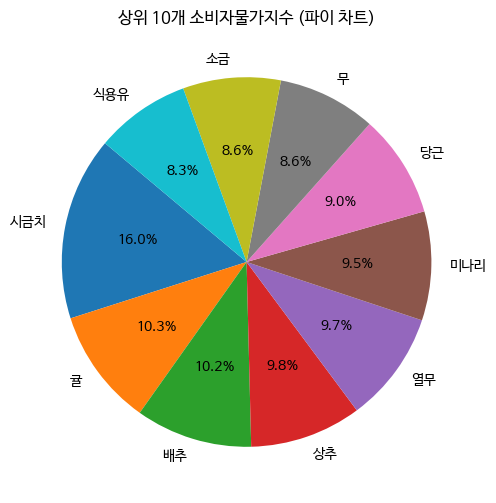

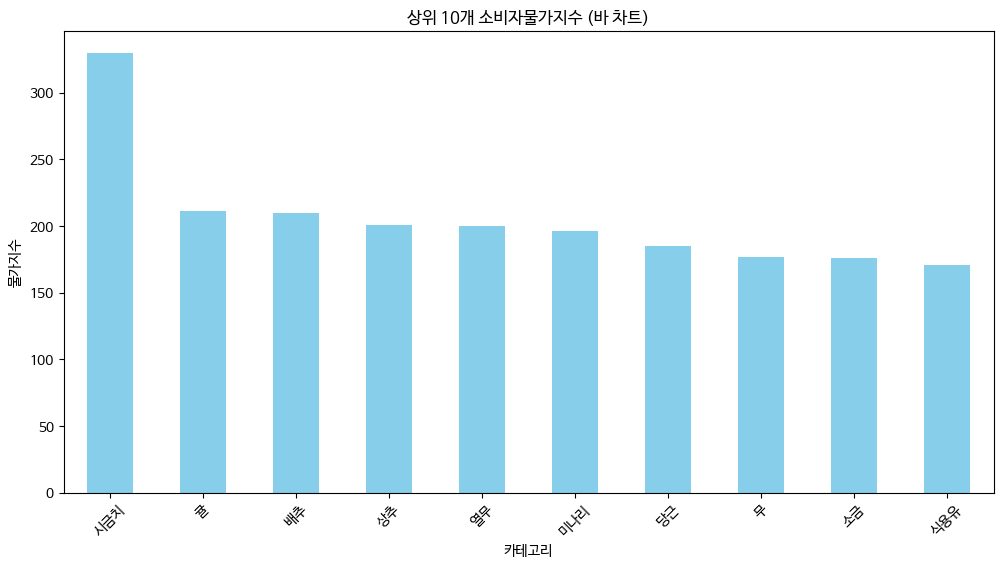

In [ ]:
# 마지막 행 선택 및 상위 10개 카테고리 선택
latest_row = cpi_df.iloc[-1, 1:]  # TIME과 합계를 제외한 카테고리 선택
top_10_features = latest_row.astype(int).nlargest(10)  # 상위 10개 추출

# 파이 차트
plt.figure(figsize=(10, 6))
plt.pie(top_10_features, labels=top_10_features.index, autopct='%1.1f%%', startangle=140)
plt.title("상위 10개 소비자물가지수 (파이 차트)")
plt.show()

# 바 차트
plt.figure(figsize=(12, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.title("상위 10개 소비자물가지수 (바 차트)")
plt.xlabel("카테고리")
plt.ylabel("물가지수")
plt.xticks(rotation=45)
plt.show()

In [ ]:
pce_df.columns

Index(['TIME', '합계', '종합소매', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점', '면세점',
       '전자상거래/통신판매', '식료품', '일반식료품', '건강보조식품', '의류/잡화', '의복/직물', '복식잡화',
       '시계/귀금속/안경', '화장품', '연료', '가구/가전', '가구', '가전제품/정보통신기기', '의료/보건', '종합병원',
       '일반병의원/기타의료기관', '자동차', '국산자동차신품', '기타운송수단', '자동차 부품 및 정비', '여행/교통',
       '여행사/자동차임대', '항공사', '대중교통', '오락/문화', '스포츠/오락/여가', '서적/문구', '교육',
       '숙박/음식', '숙박', '음식점', '공과금/개인 및 전문 서비스', '금융/보험', '기타'],
      dtype='object')

## 시계열 데이터 예측 예시

In [ ]:
# !pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/w7y7a0ja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/ahr2q4av.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92821', 'data', 'file=/tmp/tmpk1_xuc4x/w7y7a0ja.json', 'init=/tmp/tmpk1_xuc4x/ahr2q4av.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelkakvjm9n/prophet_model-20241030021536.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

<Figure size 1400x600 with 0 Axes>

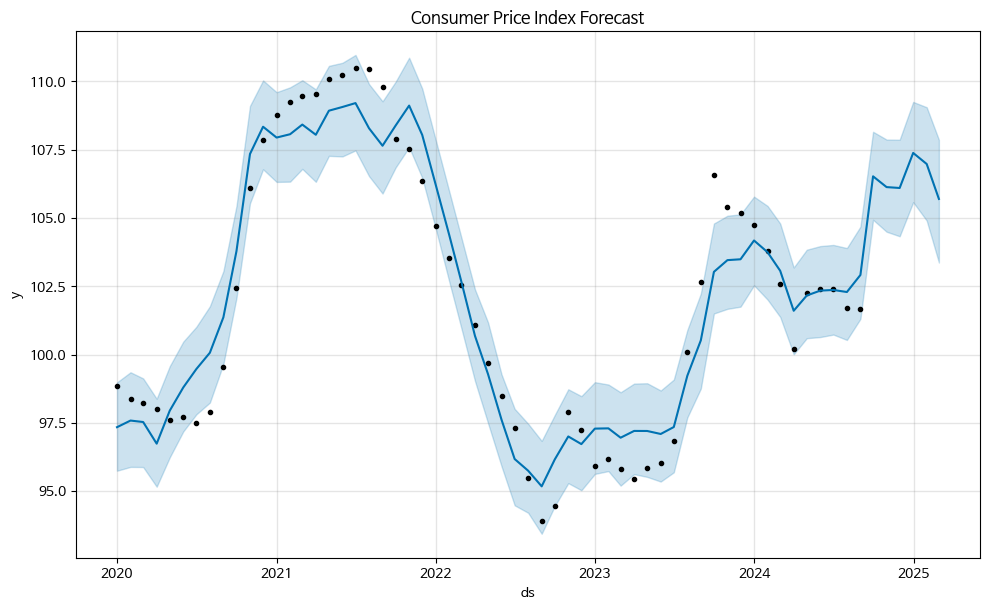

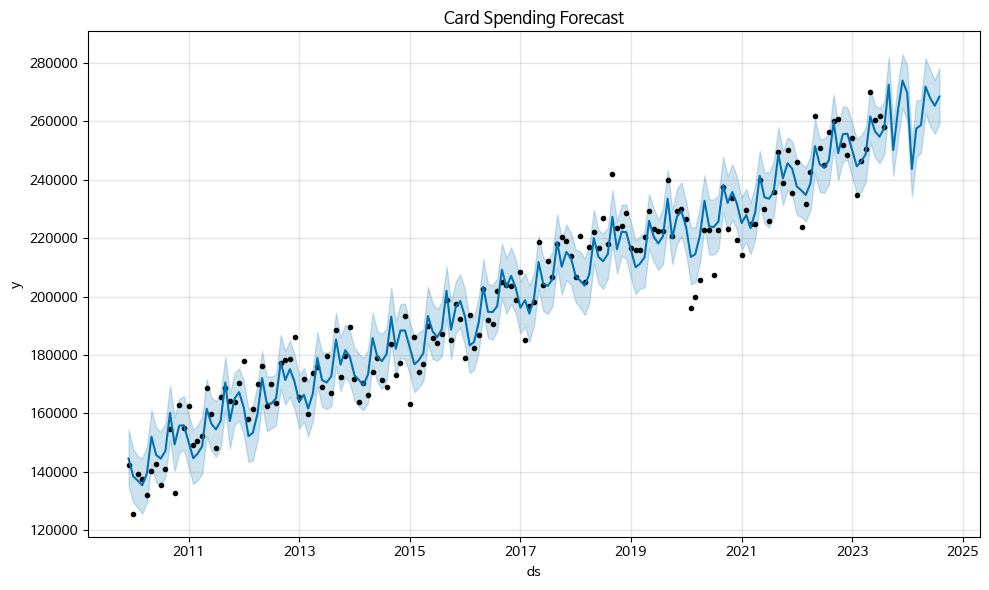

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 데이터 준비
# Propht 모델을 위한 데이터프레임 생성
# 예: 소비자 물가지수 데이터에서 시간과 값만 선택
cpi_df1 = cpi_df[['TIME', '(농산물)곡물']]
cpi_df1.columns = ['ds', 'y']

# 카드 지출 데이터에서 시간과 특정 지출 유형을 선택
spending_df = merged_df[['TIME', '종합소매']]
spending_df.columns = ['ds', 'y']

# Prophet 모델 생성 및 학습
# 소비자 물가지수 예측 모델
cpi_model = Prophet()
cpi_model.fit(cpi_df1)

# 카드 지출 예측 모델
spending_model = Prophet()
spending_model.fit(spending_df)

# 미래 예측 기간 설정 (예: 12개월)
future_cpi = cpi_model.make_future_dataframe(periods=6, freq='M')
future_spending = spending_model.make_future_dataframe(periods=12, freq='M')

# 예측
cpi_forecast = cpi_model.predict(future_cpi)
spending_forecast = spending_model.predict(future_spending)

# 시각화
plt.figure(figsize=(14, 6))

# 소비자 물가지수 예측 결과

cpi_model.plot(cpi_forecast)
plt.title("Consumer Price Index Forecast")

# 카드 지출 예측 결과

spending_model.plot(spending_forecast)
plt.title("Card Spending Forecast")

plt.tight_layout()
plt.show()


## PCE, CPI 데이터 예측력 확인 및 검증

In [ ]:
pce_df_test = pce_df.copy()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def validate_model(df, col_name):
  # Prophet용 날짜 형식 변환 및 기본 설정
  # df['TIME'] = pd.to_datetime(df['TIME'], format='%Y%m')
  df = df.rename(columns={"TIME": "ds", col_name : "y"})

  # Train/Test Split 설정
  train_size = int(len(df) * 0.8)  # 80%를 Train 데이터로 사용
  train_df = df[:train_size]
  test_df = df[train_size:]

  # Prophet 모델 학습
  model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
  model.fit(train_df)

  # 예측 시계열 생성
  future = model.make_future_dataframe(periods=len(test_df), freq='M')
  forecast = model.predict(future)

  # 성능 평가 지표 계산
  test_forecast = forecast[-len(test_df):]  # Test 구간의 예측값
  mae = mean_absolute_error(test_df['y'], test_forecast['yhat'])
  rmse = np.sqrt(mean_squared_error(test_df['y'], test_forecast['yhat']))

  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")

  # 시각화
  plt.figure(figsize=(12, 6))
  plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
  plt.plot(test_df['ds'], test_df['y'], label='Test (real-value)', color='green')
  plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Test data (predict)', color='orange')
  plt.fill_between(test_forecast['ds'], test_forecast['yhat_lower'], test_forecast['yhat_upper'], color='orange', alpha=0.2, label='unexpected range')

  plt.title("Prophet 모델을 통한 PCE 예측 결과")
  plt.xlabel("Date")
  plt.ylabel(f"PCE {col_name}")
  plt.legend()
  plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/8j15lsfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/h53u2yq9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87325', 'data', 'file=/tmp/tmpk1_xuc4x/8j15lsfe.json', 'init=/tmp/tmpk1_xuc4x/h53u2yq9.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_model24rwlvc3/prophet_model-20241030021538.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 17938.578667857917
Root Mean Squared Error (RMSE): 20753.025179523855


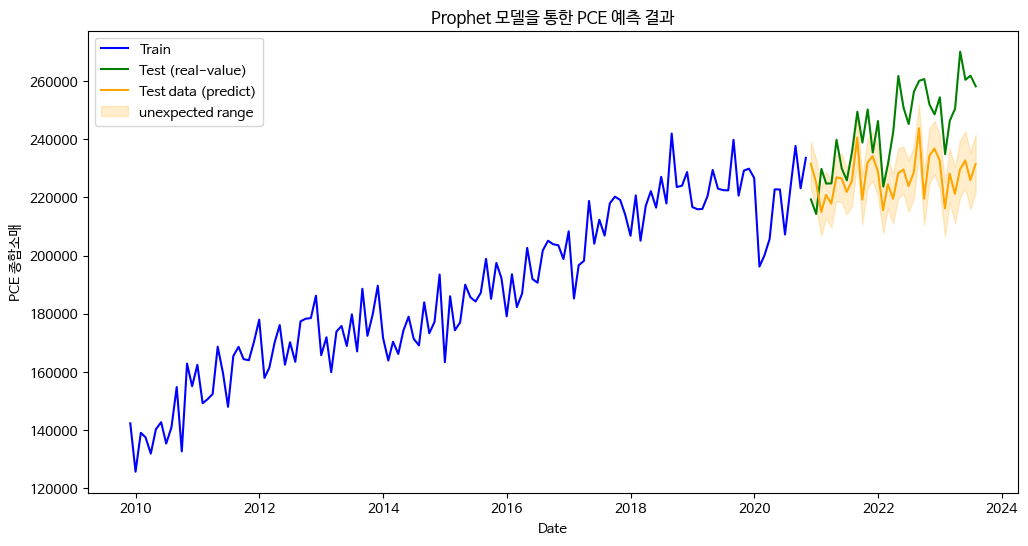

In [ ]:
# 종합소매 시계열 예측 및 검증
validate_model(pce_df.copy(), '종합소매')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/qe282e5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/q8vo0sop.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96049', 'data', 'file=/tmp/tmpk1_xuc4x/qe282e5v.json', 'init=/tmp/tmpk1_xuc4x/q8vo0sop.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelpeiikp5p/prophet_model-20241030021538.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 1.4237731934628262
Root Mean Squared Error (RMSE): 1.5535023584157905


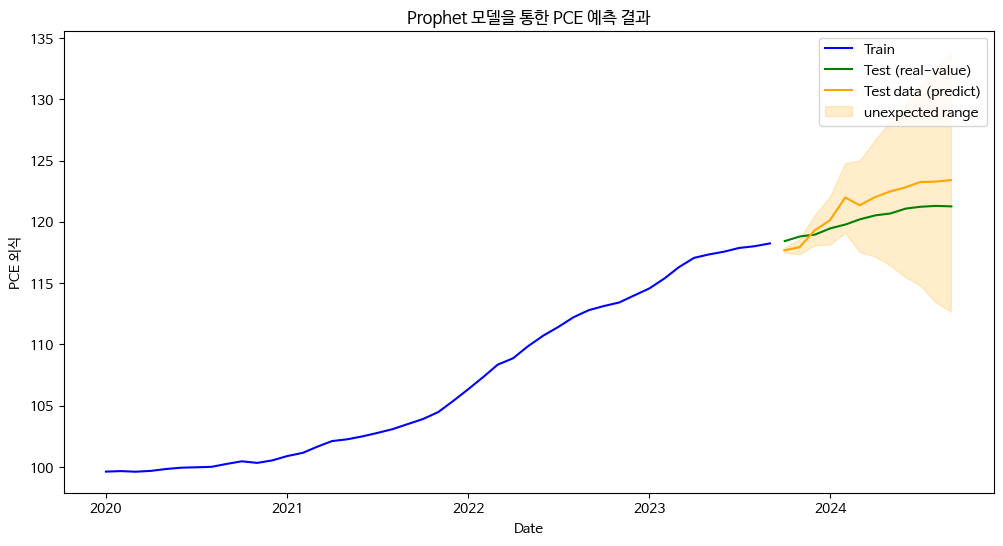

In [ ]:
# 외식 시계열 예측 및 검증
validate_model(cpi_df.copy(), '외식')

In [ ]:
pce_df.columns

Index(['TIME', '합계', '종합소매', '백화점', '대형마트/유통전문점', '슈퍼마켓', '편의점', '면세점',
       '전자상거래/통신판매', '식료품', '일반식료품', '건강보조식품', '의류/잡화', '의복/직물', '복식잡화',
       '시계/귀금속/안경', '화장품', '연료', '가구/가전', '가구', '가전제품/정보통신기기', '의료/보건', '종합병원',
       '일반병의원/기타의료기관', '자동차', '국산자동차신품', '기타운송수단', '자동차 부품 및 정비', '여행/교통',
       '여행사/자동차임대', '항공사', '대중교통', '오락/문화', '스포츠/오락/여가', '서적/문구', '교육',
       '숙박/음식', '숙박', '음식점', '공과금/개인 및 전문 서비스', '금융/보험', '기타'],
      dtype='object')

In [ ]:
cpi_df.columns

Index(['TIME', '(농산물)곡물', '(농산물)과실', '(농산물)기타농산물', '(농산물)채소', 'PC방이용료', 'TV',
       '가공식품', '가방', '가사도우미료',
       ...
       '화장지', '화장품', '화초', '회화용구', '휘발유', '휴대용멀티미디어기기', '휴대전화기', '휴대전화기수리비',
       '휴대전화료', '휴양시설이용료'],
      dtype='object', name='C2_NM', length=482)

## 항목 카테고리에 대응하는 feature들을 묶어 그룹화하여 데이터프레임 생성

In [ ]:
import pandas as pd

# 데이터 프레임 예시
# pce_df = pd.read_csv('path_to_pce_data.csv') # 개인 신용카드 지출 데이터
# cpi_df = pd.read_csv('path_to_cpi_data.csv') # 소비자물가지수 데이터

# 소비 유형별 품목 분류
category_mapping = {
    '합계': ['총지수'],
    # '종합소매': [],
    # '전자상거래/통신판매': [],
    '식료품': ['농축수산물', '가공식품'],
    '의류/잡화': ['섬유제품', '장신구', '가방', '핸드백', '우산'],
    '연료': ['석유류', '전기 · 가스 · 수도'],
    '가구/가전': ['내구재'],
    '의료/보건': ['의약품', '의료기기'],
    '자동차': ['소형승용차', '중형승용차', '대형승용차', '경승용차', '다목적승용차', '수입승용차', '전기동력차', '자전거'],
    '여행/교통': ['여행', '교통'],
    '오락/문화': ['문화', '예술'],
    '교육': ['교육', '서적'],
    '숙박/음식': ['숙박', '음식'],
    '공과금/개인 및 전문 서비스': ['공공서비스', '의료서비스'],
    '금융/보험': ['금융서비스', '보험서비스']
}

# 15개 카테고리별 데이터프레임 생성
total_df = pd.merge(pce_df[['TIME', '합계']], cpi_df[['TIME','총지수']])
eat_df = pd.merge(pce_df[['TIME', '식료품']], pd.concat([cpi_df['TIME'], cpi_df[['농축수산물', '가공식품']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_식료품'}))
cloth_df = pd.merge(pce_df[['TIME', '의류/잡화']], pd.concat([cpi_df['TIME'], cpi_df[['섬유제품', '장신구', '가방', '핸드백', '우산']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_의류/잡화'}))
oil_df = pd.merge(pce_df[['TIME', '연료']], pd.concat([cpi_df['TIME'], cpi_df[['석유류', '전기 · 가스 · 수도']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_연료'}))
furniture_df = pd.merge(pce_df[['TIME', '가구/가전']], pd.concat([cpi_df['TIME'], cpi_df['내구재']], axis=1).rename(columns={0: 'cpi_가구/가전'}))
health_df = pd.merge(pce_df[['TIME', '의료/보건']], pd.concat([cpi_df['TIME'], cpi_df[['의약품', '의료측정기', '보청기', '치료재료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_의료/보건'}))
car_df = pd.merge(pce_df[['TIME', '자동차']], pd.concat([cpi_df['TIME'], cpi_df[['소형승용차', '중형승용차', '대형승용차', '경승용차', '다목적승용차', '수입승용차', '전기동력차', '자전거']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_자동차'}))
trip_df = pd.merge(pce_df[['TIME', '여행/교통']], pd.concat([cpi_df['TIME'], cpi_df[['국내단체여행비', '해외단체여행비', '국제항공료', '택시료', '시외버스료', '시내버스료', '도시철도료', '열차료', '도로통행료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_여행/교통'}))
art_df = pd.merge(pce_df[['TIME', '오락/문화']], pd.concat([cpi_df['TIME'], cpi_df[['수영장이용료', '놀이시설이용료', '운동경기관람료', '공연예술관람료', '관람시설이용료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_오락/문화'}))
edu_df = pd.merge(pce_df[['TIME', '교육']], pd.concat([cpi_df['TIME'], cpi_df[['학교보충교육비', '서적']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_교육'}))
accomodation_df = pd.merge(pce_df[['TIME', '숙박/음식']], pd.concat([cpi_df['TIME'], cpi_df[['호텔숙박료', '여관숙박료', '콘도이용료','외식']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_숙박/음식'}))
service_df = pd.merge(pce_df[['TIME', '공과금/개인 및 전문 서비스']], pd.concat([cpi_df['TIME'], cpi_df[['공공서비스', '건강검진비', '병원검사료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_공과금/개인 및 전문 서비스'}))
bank_df = pd.merge(pce_df[['TIME', '금융/보험']], pd.concat([cpi_df['TIME'], cpi_df[['금융수수료', '보험서비스료', '자동차보험료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_금융/보험'}))

In [ ]:
eat_df.head()

,TIME,식료품,cpi_식료품
0,2020-01-01,34062,97.465
1,2020-02-01,23346,97.000
2,2020-03-01,24911,98.200
3,2020-04-01,26259,97.755
4,2020-05-01,29487,98.555


In [ ]:
# 예측 및 시각화 함수 정의
def forecast_future(dataframe, column_name, periods=3):
    # Prophet이 요구하는 ds, y 열 이름으로 변경
    df_prophet = dataframe[['TIME', column_name]].rename(columns={'TIME': 'ds', column_name: 'y'})
    model = Prophet()
    model.fit(df_prophet)

    # 미래 날짜 생성 및 예측 수행
    future = model.make_future_dataframe(periods=periods, freq='MS')
    forecast = model.predict(future)

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


def plot_forecast_and_cpi(eat_df, feature_name, cpi_feature_name):
    # 예측 결과 얻기
    forecast_feature = forecast_future(eat_df, feature_name)
    forecast_cpi_feature = forecast_future(eat_df, cpi_feature_name)

    # 그래프 시각화
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 첫 번째 y축 (왼쪽): feature
    ax1.plot(forecast_feature['ds'], forecast_feature['yhat'], label='Card Spending', color="blue")
    ax1.fill_between(forecast_feature['ds'], forecast_feature['yhat_lower'], forecast_feature['yhat_upper'], color="blue", alpha=0.2)
    ax1.set_ylabel(f"PCE {feature_name} 지출", color="blue")
    ax1.tick_params(axis='y', labelcolor="blue")

    # 두 번째 y축 (오른쪽): cpi_feature
    ax2 = ax1.twinx()
    ax2.plot(forecast_cpi_feature['ds'], forecast_cpi_feature['yhat'], label='CPI', color="orange")
    ax2.fill_between(forecast_cpi_feature['ds'], forecast_cpi_feature['yhat_lower'], forecast_cpi_feature['yhat_upper'], color="orange", alpha=0.2)
    ax2.set_ylabel(f"{cpi_feature_name} 지수", color="orange")
    ax2.tick_params(axis='y', labelcolor="orange")

    # 범례 설정
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.title(f"{feature_name} 지출 및 {cpi_feature_name} 지수 예측")
    plt.xlabel("Date")
    plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/wu_pkyzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/muvwo9c3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65011', 'data', 'file=/tmp/tmpk1_xuc4x/wu_pkyzf.json', 'init=/tmp/tmpk1_xuc4x/muvwo9c3.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelvgf5_5h7/prophet_model-20241030021551.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

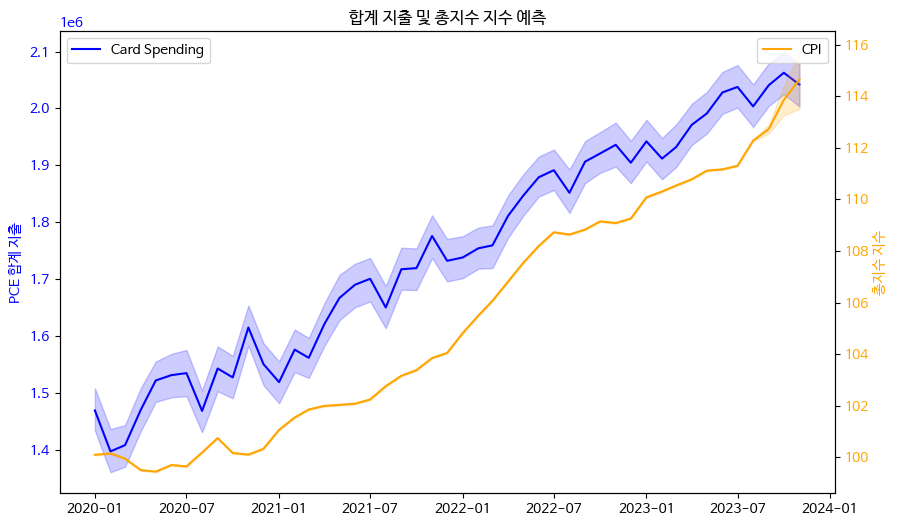

In [ ]:
# 카드 소비 합계와 CPI 총지수 예측값 시각화
plot_forecast_and_cpi(total_df, total_df.columns[1], total_df.columns[2])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/okk3nvgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/6wc96ub8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8671', 'data', 'file=/tmp/tmpk1_xuc4x/okk3nvgi.json', 'init=/tmp/tmpk1_xuc4x/6wc96ub8.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelz8c6n3gi/prophet_model-20241030021552.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

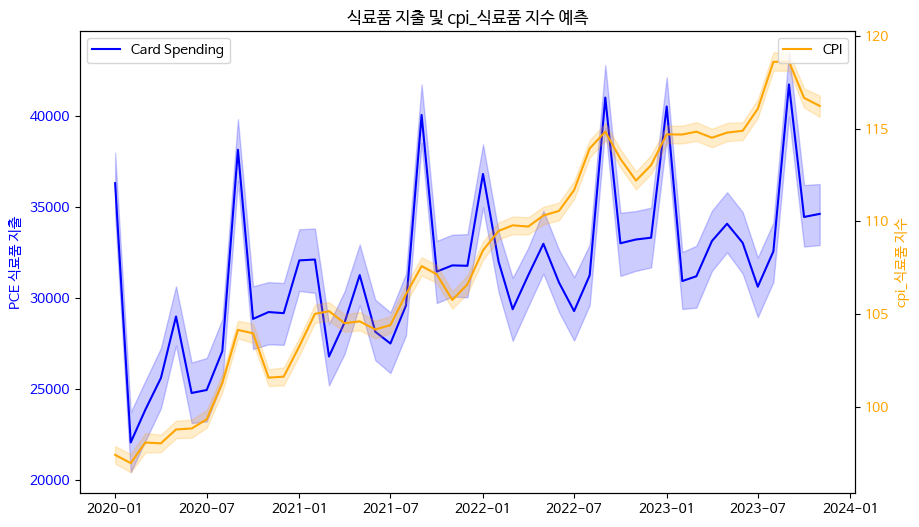

In [ ]:
# 식료품 지출, 식료품 cpi 예측값 시각화
plot_forecast_and_cpi(eat_df, eat_df.columns[1], eat_df.columns[2])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/5lrwts89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/nxel9vsl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15045', 'data', 'file=/tmp/tmpk1_xuc4x/5lrwts89.json', 'init=/tmp/tmpk1_xuc4x/nxel9vsl.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelxyedns0g/prophet_model-20241030021553.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

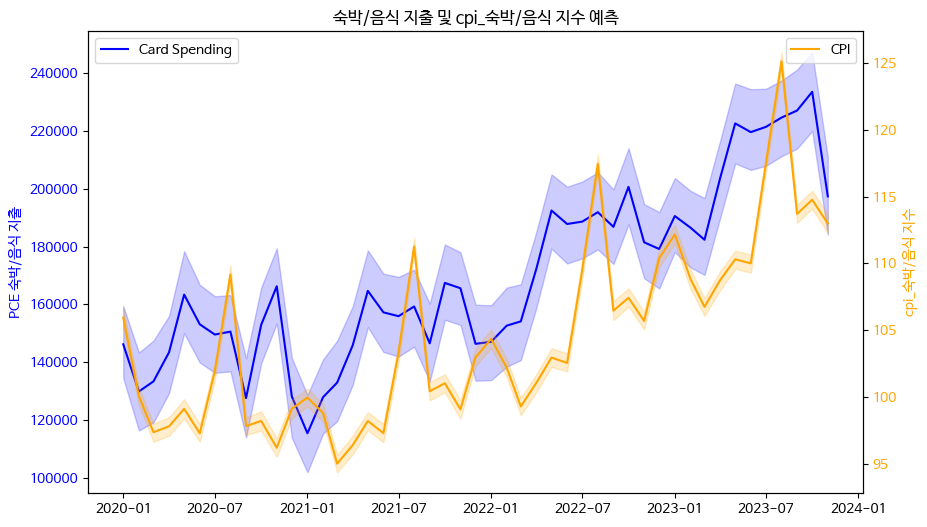

In [ ]:
# 숙박/음식 지출, 숙박/음식 cpi 예측값 시각화
plot_forecast_and_cpi(accomodation_df, accomodation_df.columns[1],accomodation_df.columns[2])

In [ ]:
forecast_future(eat_df, eat_df.columns[1]).head()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/hcxvszgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/66rfat1b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47013', 'data', 'file=/tmp/tmpk1_xuc4x/hcxvszgj.json', 'init=/tmp/tmpk1_xuc4x/66rfat1b.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelqwr7nsrv/prophet_model-20241030023726.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:37:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:37:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,36290.340885,34645.123021,37965.899590
1,2020-02-01,22077.419860,20334.410738,23870.489160
2,2020-03-01,23868.513055,22295.078973,25507.027301
3,2020-04-01,25612.890990,23796.965073,27303.234669
4,2020-05-01,28982.040748,27228.632837,30703.569629


In [ ]:
pce_eat_df = forecast_future(eat_df, eat_df.columns[1])
cpi_eat_df = forecast_future(eat_df, eat_df.columns[2])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/5si8u3o_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/94k2aqg7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81578', 'data', 'file=/tmp/tmpk1_xuc4x/5si8u3o_.json', 'init=/tmp/tmpk1_xuc4x/94k2aqg7.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_modelvyhs4wk2/prophet_model-20241030021555.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:15:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:15:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# PCE 식료품 지출 (왼쪽 y축)
fig.add_trace(go.Scatter(
    x=pce_eat_df['ds'], y=pce_eat_df['yhat'],
    mode='lines', line=dict(color='blue', width=2),
    name='Card Spending'
), secondary_y=False)

fig.add_trace(go.Scatter(
    x=pce_eat_df['ds'], y=pce_eat_df['yhat_upper'],
    mode='lines', line=dict(color='blue', width=0.5), opacity=0.3,
    showlegend=False
), secondary_y=False)

fig.add_trace(go.Scatter(
    x=pce_eat_df['ds'], y=pce_eat_df['yhat_lower'],
    mode='lines', line=dict(color='blue', width=0.5), opacity=0.3,
    fill='tonexty', name='PCE Confidence Interval'
), secondary_y=False)

# CPI 지수 (오른쪽 y축)
fig.add_trace(go.Scatter(
    x=cpi_eat_df['ds'], y=cpi_eat_df['yhat'],
    mode='lines', line=dict(color='orange', width=2),
    name='CPI'
), secondary_y=True)

fig.add_trace(go.Scatter(
    x=cpi_eat_df['ds'], y=cpi_eat_df['yhat_upper'],
    mode='lines', line=dict(color='orange', width=0.5), opacity=0.3,
    showlegend=False
), secondary_y=True)

fig.add_trace(go.Scatter(
    x=cpi_eat_df['ds'], y=cpi_eat_df['yhat_lower'],
    mode='lines', line=dict(color='orange', width=0.5), opacity=0.3,
    fill='tonexty', name='CPI Confidence Interval'
), secondary_y=True)

# Layout 설정
fig.update_layout(
    title='식료품 지출 및 CPI_식료품 지수 예측',
    xaxis=dict(title='Date'),
    legend=dict(x=0.1, y=1)
)

# 왼쪽 y축 (PCE 식료품 지출)
fig.update_yaxes(
    title_text="PCE 식료품 지출", titlefont=dict(color='blue'), tickfont=dict(color='blue'),
    range=[pce_eat_df['yhat_lower'].min(), pce_eat_df['yhat_upper'].max()],
    secondary_y=False
)

# 오른쪽 y축 (CPI 식료품 지수)
fig.update_yaxes(
    title_text="CPI 식료품 지수", titlefont=dict(color='orange'), tickfont=dict(color='orange'),
    range=[cpi_eat_df['yhat_lower'].min(), cpi_eat_df['yhat_upper'].max()],
    secondary_y=True
)

fig.show()


In [ ]:
import functools
import pandas
import prophet

In [ ]:
print(requests.__version__)
print(pandas.__version__)
print(prophet.__version__)

# requests.__version__==2.32.3
# pandas.__version__==2.2.2
# prophet.__version__==1.1.6

2.32.3
2.2.2
1.1.6


In [ ]:
python.__version__

NameError: name 'python' is not defined

In [ ]:
# import requests
# import pandas as pd
# from functools import reduce
# from airflow import DAG
# from airflow.operators.python_operator import PythonOperator
# from elasticsearch import Elasticsearch
# from datetime import datetime, timedelta
# from prophet import Prophet
# import eland as ed

# # API 기본 URL
# base_url = "https://ecos.bok.or.kr/api/StatisticSearch/2IJKJSOY6OFOQZ28900C/json/kr/1/100000/601Y002/M/200001/202409/X/{}/DAV"

# # 분류 코드 리스트
# codes = [1000, 1100, 1110, 1120, 1130, 1140, 1150, 1200, 1300, 1310, 1320, 1400, 1410, 1420, 1430, 1440, 1500, 1600, 1610, 1620, 1700, 1710, 1720, 1800, 1810, 1820, 1830, 1900, 1910, 1920, 1930, 2000, 2010, 2020, 2100, 2200, 2210, 2220, 2300, 2400, 2500]

# # 각 분류 코드에 대한 데이터를 저장할 리스트
# df_list = []

# # 각 분류 코드에 맞는 데이터프레임 생성
# for code in codes:
#     url = base_url.format(code)
#     response = requests.get(url)
#     data = response.json()

#     if 'StatisticSearch' in data and 'row' in data['StatisticSearch']:
#         # 데이터프레임 생성
#         df = pd.DataFrame(data['StatisticSearch']['row'])

#         # 'ITEM_NAME2'를 새로운 열 이름으로 설정
#         item_name = df['ITEM_NAME2'].iloc[0]

#         # 필요한 열만 남기고 'DATA_VALUE' 열 이름을 ITEM_NAME2 값으로 변경
#         df = df[['TIME', 'DATA_VALUE']]
#         df.rename(columns={'DATA_VALUE': item_name}, inplace=True)

#         # 데이터프레임 리스트에 추가
#         df_list.append(df)
#     else:
#         print(f"데이터가 없습니다: 코드 {code}")

# # 모든 데이터프레임을 TIME을 기준으로 병합
# if df_list:
#     merged_df = reduce(lambda left, right: pd.merge(left, right, on='TIME', how='outer'), df_list)
#     print(merged_df.head())  # 병합된 데이터프레임 확인
# else:
#     print("병합할 데이터프레임이 없습니다.")

# merged_df.TIME = pd.to_datetime(merged_df.TIME, format='%Y%m')
# # 문자열 형태의 숫자를 수치형으로 변환 후, int로 타입 변환
# for i in merged_df.columns[1:]:
#     merged_df[i] = merged_df[i].apply(pd.to_numeric)

# pce_df = merged_df.copy()

# # API 호출 URL
# url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
# params = {
#     "method": "getList",
#     "apiKey": "NGFlNDEwNzU4NTVjN2Y2ZTcyYzJiYmI5NjlhY2ExMzc=",  # API 키
#     "orgId": "101",
#     "tblId": "DT_1J22112",
#     "itmId": "T+",
#     "objL1": "T10+",
#     "objL2": "ALL",
#     "format": "json",
#     "jsonVD": "Y",
#     "prdSe": "M",
#     "startPrdDe": "202001",
#     "endPrdDe": "202409",
#     "outputFields": "ORG_ID TBL_ID TBL_NM OBJ_ID OBJ_NM NM ITM_ID ITM_NM UNIT_NM PRD_SE PRD_DE LST_CHN_DE"
# }

# # API 요청 및 JSON 데이터 가져오기
# response = requests.get(url, params=params)
# data = response.json()

# # 데이터프레임 변환
# df = pd.DataFrame(data)

# # 피벗 테이블 생성
# pivot_df = df.pivot_table(index='PRD_DE', columns='C2_NM', values='DT', aggfunc='max')

# # 인덱스를 리셋하여 날짜를 열로 만듦
# cpi_df = pivot_df.reset_index()

# cpi_df.PRD_DE = pd.to_datetime(cpi_df.PRD_DE, format='%Y%m')
# # 문자열 형태의 숫자를 수치형으로 변환 후, int로 타입 변환
# for i in cpi_df.columns[1:]:
#     cpi_df[i] = cpi_df[i].apply(pd.to_numeric)

# cpi_df.rename(columns={'PRD_DE': 'TIME'}, inplace=True)

# # 소비 유형별 품목 분류
# category_mapping = {
#     '합계': ['총지수'],
#     # '종합소매': [],
#     # '전자상거래/통신판매': [],
#     '식료품': ['농축수산물', '가공식품'],
#     '의류/잡화': ['섬유제품', '장신구', '가방', '핸드백', '우산'],
#     '연료': ['석유류', '전기 · 가스 · 수도'],
#     '가구/가전': ['내구재'],
#     '의료/보건': ['의약품', '의료기기'],
#     '자동차': ['소형승용차', '중형승용차', '대형승용차', '경승용차', '다목적승용차', '수입승용차', '전기동력차', '자전거'],
#     '여행/교통': ['여행', '교통'],
#     '오락/문화': ['문화', '예술'],
#     '교육': ['교육', '서적'],
#     '숙박/음식': ['숙박', '음식'],
#     '공과금/개인 및 전문 서비스': ['공공서비스', '의료서비스'],
#     '금융/보험': ['금융서비스', '보험서비스']
# }

# # 15개 카테고리별 데이터프레임 생성
# total_df = pd.merge(pce_df[['TIME', '합계']], cpi_df[['TIME','총지수']])
# eat_df = pd.merge(pce_df[['TIME', '식료품']], pd.concat([cpi_df['TIME'], cpi_df[['농축수산물', '가공식품']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_식료품'}))
# cloth_df = pd.merge(pce_df[['TIME', '의류/잡화']], pd.concat([cpi_df['TIME'], cpi_df[['섬유제품', '장신구', '가방', '핸드백', '우산']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_의류/잡화'}))
# oil_df = pd.merge(pce_df[['TIME', '연료']], pd.concat([cpi_df['TIME'], cpi_df[['석유류', '전기 · 가스 · 수도']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_연료'}))
# furniture_df = pd.merge(pce_df[['TIME', '가구/가전']], pd.concat([cpi_df['TIME'], cpi_df['내구재']], axis=1).rename(columns={0: 'cpi_가구/가전'}))
# health_df = pd.merge(pce_df[['TIME', '의료/보건']], pd.concat([cpi_df['TIME'], cpi_df[['의약품', '의료측정기', '보청기', '치료재료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_의료/보건'}))
# car_df = pd.merge(pce_df[['TIME', '자동차']], pd.concat([cpi_df['TIME'], cpi_df[['소형승용차', '중형승용차', '대형승용차', '경승용차', '다목적승용차', '수입승용차', '전기동력차', '자전거']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_자동차'}))
# trip_df = pd.merge(pce_df[['TIME', '여행/교통']], pd.concat([cpi_df['TIME'], cpi_df[['국내단체여행비', '해외단체여행비', '국제항공료', '택시료', '시외버스료', '시내버스료', '도시철도료', '열차료', '도로통행료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_여행/교통'}))
# art_df = pd.merge(pce_df[['TIME', '오락/문화']], pd.concat([cpi_df['TIME'], cpi_df[['수영장이용료', '놀이시설이용료', '운동경기관람료', '공연예술관람료', '관람시설이용료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_오락/문화'}))
# edu_df = pd.merge(pce_df[['TIME', '교육']], pd.concat([cpi_df['TIME'], cpi_df[['학교보충교육비', '서적']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_교육'}))
# accomodation_df = pd.merge(pce_df[['TIME', '숙박/음식']], pd.concat([cpi_df['TIME'], cpi_df[['호텔숙박료', '여관숙박료', '콘도이용료','외식']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_숙박/음식'}))
# service_df = pd.merge(pce_df[['TIME', '공과금/개인 및 전문 서비스']], pd.concat([cpi_df['TIME'], cpi_df[['공공서비스', '건강검진비', '병원검사료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_공과금/개인 및 전문 서비스'}))
# bank_df = pd.merge(pce_df[['TIME', '금융/보험']], pd.concat([cpi_df['TIME'], cpi_df[['금융수수료', '보험서비스료', '자동차보험료']].mean(axis=1)], axis=1).rename(columns={0: 'cpi_금융/보험'}))

# # 예측 및 시각화 함수 정의
# def forecast_future(dataframe, column_name, periods=3):
#     # Prophet이 요구하는 ds, y 열 이름으로 변경
#     df_prophet = dataframe[['TIME', column_name]].rename(columns={'TIME': 'ds', column_name: 'y'})
#     model = Prophet()
#     model.fit(df_prophet)

#     # 미래 날짜 생성 및 예측 수행
#     future = model.make_future_dataframe(periods=periods, freq='MS')
#     forecast = model.predict(future)

#     return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


# pce_eat_df = forecast_future(eat_df, eat_df.columns[1])
# cpi_eat_df = forecast_future(eat_df, eat_df.columns[2])

# es = Elasticsearch('http://host.docker.internal:9200')

# try :
#     es.indice.create('항목별 개인 신용카드 소비현황')
#     es.indice.create('소비자물가지수')
# except :
#     pass

# def dataframe_to_elasticsearch():
#     ed.pandas_to_eland(
#         pd_df=pce_eat_df,
#         es_client=es,
#         es_dest_index="항목별 개인 신용카드 소비현황",
#         es_if_exists="append",
#         es_refresh=True
#         )

#     ed.pandas_to_eland(
#         pd_df=cpi_eat_df,
#         es_client=es,
#         es_dest_index="소비자물가지수",
#         es_if_exists="append",
#         es_refresh=True
#         )



# default_args = {
#     'depends_on_past': False,
#     'retires': 1,
#     'retry_delay': timedelta(minutes=5)
# }

# # DAG 정의
# with DAG(
#     'fred_uploader_elasticsearch2',
#     default_args=default_args,
#     description="연준 데이터를 Elasticsearch에 집어 넣습니다.",
#     schedule_interval='@daily',
#     start_date=datetime(2015, 1, 1),
#     catchup=False,
#     tags=['elasticsearch','test', 'fred'],
# ) as dag:

#     # PythonOperator 설정
#     t1 = PythonOperator(
#         task_id="upload_fred_data_to_elasticsearch",
#         python_callable=dataframe_to_elasticsearch,
#         execution_timeout=timedelta(minutes=5) # 태스크 최대 실행 시간 설정
#     )

#     t1

import requests
import pandas as pd
from functools import reduce
# from airflow import DAG
# from airflow.operators.python_operator import PythonOperator
# from elasticsearch import Elasticsearch
from datetime import datetime, timedelta
from prophet import Prophet
# import eland as ed

# Elasticsearch 클라이언트 생성
# es = Elasticsearch('http://host.docker.internal:9200')

# API 요청 및 데이터 처리 함수
def fetch_and_process_data():
    # 개인 신용카드 소비 데이터 가져오기
    base_url = "https://ecos.bok.or.kr/api/StatisticSearch/2IJKJSOY6OFOQZ28900C/json/kr/1/100000/601Y002/M/200001/202409/X/{}/DAV"
    codes = [1000, 1100, 1110, 1120, 1130, 1140, 1150, 1200, 1300]  # 간단히 일부 코드만 사용

    df_list = []
    for code in codes:
        url = base_url.format(code)
        response = requests.get(url)
        data = response.json()

        if 'StatisticSearch' in data and 'row' in data['StatisticSearch']:
            df = pd.DataFrame(data['StatisticSearch']['row'])
            item_name = df['ITEM_NAME2'].iloc[0]
            df = df[['TIME', 'DATA_VALUE']].rename(columns={'DATA_VALUE': item_name})
            df_list.append(df)

    pce_df = reduce(lambda left, right: pd.merge(left, right, on='TIME', how='outer'), df_list) if df_list else None

    # 소비자 물가지수(CPI) 데이터 가져오기
    url = "https://kosis.kr/openapi/Param/statisticsParameterData.do"
    params = {
        "method": "getList",
        "apiKey": "NGFlNDEwNzU4NTVjN2Y2ZTcyYzJiYmI5NjlhY2ExMzc=",
        "orgId": "101",
        "tblId": "DT_1J22112",
        "itmId": "T+",
        "objL1": "T10+",
        "objL2": "ALL",
        "format": "json",
        "jsonVD": "Y",
        "prdSe": "M",
        "startPrdDe": "202001",
        "endPrdDe": "202409"
    }

    response = requests.get(url, params=params)
    cpi_df = pd.DataFrame(response.json()).pivot_table(index='PRD_DE', columns='C2_NM', values='DT', aggfunc='max').reset_index()

    # 데이터 전처리
    pce_df['TIME'] = pd.to_datetime(pce_df['TIME'], format='%Y%m')
    cpi_df['PRD_DE'] = pd.to_datetime(cpi_df['PRD_DE'], format='%Y%m')
    cpi_df.rename(columns={'PRD_DE': 'TIME'}, inplace=True)

    return pce_df, cpi_df

# Prophet 예측 함수
def forecast_future(dataframe, column_name, periods=3):
    df_prophet = dataframe[['TIME', column_name]].rename(columns={'TIME': 'ds', column_name: 'y'})
    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=periods, freq='M')
    forecast = model.predict(future)

    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Elasticsearch로 데이터 적재 함수
def dataframe_to_elasticsearch():
    pce_df, cpi_df = fetch_and_process_data()  # 데이터 가져오기

    # 특정 항목 예측
    pce_eat_df = forecast_future(pce_df, '식료품')
    cpi_eat_df = forecast_future(cpi_df, '농축수산물')

    return pce_eat_df

dataframe_to_elasticsearch()

    # Elasticsearch 인덱스 생성 (없을 경우)
#     try:
#         es.indices.create(index='항목별_개인_신용카드_소비현황')
#         es.indices.create(index='소비자물가지수')
#     except:
#         pass  # 이미 인덱스가 존재할 경우 예외 처리

#     # 데이터 Elasticsearch로 전송
#     ed.pandas_to_eland(
#         pd_df=pce_eat_df,
#         es_client=es,
#         es_dest_index="항목별_개인_신용카드_소비현황",
#         es_if_exists="append",
#         es_refresh=True
#     )
#     ed.pandas_to_eland(
#         pd_df=cpi_eat_df,
#         es_client=es,
#         es_dest_index="소비자물가지수",
#         es_if_exists="append",
#         es_refresh=True
#     )

# # DAG 기본 설정
# default_args = {
#     'depends_on_past': False,
#     'retries': 1,
#     'retry_delay': timedelta(minutes=5)
# }

# # DAG 정의
# with DAG(
#     'cpi_pce_timeseries',
#     default_args=default_args,
#     description="pci,cpi 예측 데이터를 Elasticsearch에 업로드",
#     schedule_interval='@daily',
#     start_date=datetime(2020, 1, 1),
#     catchup=False,
#     tags=['elasticsearch', 'fred']
# ) as dag:

#     # PythonOperator 생성
#     upload_task = PythonOperator(
#         task_id="upload_fred_data_to_elasticsearch",
#         python_callable=dataframe_to_elasticsearch,
#     )

#     upload_task  # DAG에서 실행될 작업 등록

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/xgduk_nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1_xuc4x/75czq3xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47287', 'data', 'file=/tmp/tmpk1_xuc4x/xgduk_nz.json', 'init=/tmp/tmpk1_xuc4x/75czq3xj.json', 'output', 'file=/tmp/tmpk1_xuc4x/prophet_model836qfjbu/prophet_model-20241030082849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:28:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:28:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

,ds,yhat,yhat_lower,yhat_upper
0,2009-12-01,13356.365896,10980.405909,15595.424644
1,2010-01-01,16126.805415,13982.847120,18246.193783
2,2010-02-01,14942.504315,12637.695192,17135.220714
3,2010-03-01,11930.350259,9599.267616,14209.732351
4,2010-04-01,12918.226077,10623.633510,15096.816195
...,...,...,...,...
163,2023-07-01,32004.201828,29883.637419,34270.396778
164,2023-08-01,33959.036332,31690.677077,36213.008565
165,2023-08-31,40544.692294,38067.486068,42781.688490
166,2023-09-30,32810.171392,30718.942506,35100.081186
